# Project: Wrangling and Analyze WeRateDogs Twitter data

# Table of contents
- [Introduction](#intro)
- [Data Gathering](#gathering)
- [Data Assessing](#assessing)
- [Data Cleaning](#cleaning)
- [Exploratory Data Analysis](#analysis)
- [Conclusion](#conclusion)

<a id='intro'></a>
## Introduction

The dataset that I will be wrangling then analyzing is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage.

In [1]:
import numpy as np
import pandas as pd
import requests 
import os
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

<a id='gathering'></a>
## Data Gathering

Data will be gathered is:
1. The WeRateDogs Twitter archive
2. The tweet image predictions
3. Additional Data via the Twitter API

### The WeRateDogs Twitter archive from local

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### The tweet image predictions using Requests library

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.exists(url.split('/')[-1]):
    response = requests.get(url)
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Additional Data via the Twitter API using Tweepy library

In [5]:
'''
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

'\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tweet_id.values

In [6]:
# Read text file line by line to create dataframe
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
api_data = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [7]:
api_data = api_data[['id', 'retweet_count', 'favorite_count']]
 
api_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


This is the end of gathering data step. We got 3 data frames: archive, image_predictions, api_data.

<a id='assessing'></a>
## Assessing Data

We will looking for issues in quality and tidiness using two types of assessment:
1. Visual assessment
2. Programmatic assessment



The issues will be documented at the end of this section.

### archive

In [8]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Tripp        1
Emma         1
Bert         1
Dook         1
Ito          1
Name: name, Length: 957, dtype: int64

In [11]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
#checking for duplicacy
sum(archive.duplicated())

0

In [14]:
#checking for duplicacy in images

archive.expanded_urls.duplicated().sum()

137

In [15]:
#checking for any retweets
total_tweets = archive.tweet_id.count()
not_retweets = archive.retweeted_status_id.isnull().sum()
retweets = total_tweets - not_retweets
retweets

181

In [16]:
archive.source.isnull().sum()

0

In [17]:
#checking for tweets without photo
x = archive[archive.expanded_urls.isnull() == True].expanded_urls
len(x)

59

In [18]:
archive.expanded_urls[15]

'https://twitter.com/dog_rates/status/889278841981685760/video/1'

In [19]:
# Sort by rating_denominator values
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### image_predictions

In [20]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#checking for duplicacy
sum(image_predictions.duplicated())

0

In [23]:
#checking for duplicacy in images
sum(image_predictions.jpg_url.duplicated())

66

### api_data

In [24]:
api_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [25]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
#checking for duplicacy
sum(api_data.duplicated())

0

### Quality issues
1. [Programmatically] In archive, there are some retweets. **DONE**

2. [visually] In archive, 'source' values in unneed template. **DONE**

3. [Programmatically] In archive, some tweets does not have a photo. **DONE**

4. [Programmatically] In archive, uncorrect dog names. **DONE**

5. [Programmatically] In archive, erroneous datatypes for some columns. **DONE**

6. [visually] In archive, there are unneeded columns. **DONE**

6. [Programmatically] In image_predictions, there are duplicated images. **DONE**
 
9. [Programmatically] In archive, rating_denominator have diffrent values **DONE**

10. [visually & Programmatically] In api_data, id column should be string and named 'tweet_id' **DONE**



### Tidiness issues
1. [visual] In archive, columns (doggo, floofer, pupper, puppo) should be one column "dog_stage" with different values. **DONE**

3. [visual] In api_data, (retweet_count, favorite_count) should be part of archive table **DONE**

<a id='cleaning'></a>
## Cleaning Data
Trying to resolve the issues observed in assessting section.

In [27]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
api_data_clean = api_data.copy()

### uncorrect dog names:

#### Define:

Replace all uncorrect names to none

#### Code

In [28]:
uncorrect = archive_clean[archive_clean.name.str.islower()==True]['name'].unique()
uncorrect

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [29]:
for i in uncorrect:
    archive_clean.name.replace(i, 'None', inplace=True)

#### Test

In [30]:
archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [31]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

### Issue rating_denominator have diffrent values:

#### Define
Assign 10 to rating_denominator column values

#### Code

In [32]:
archive_clean.rating_denominator= archive_clean['rating_denominator']=10


#### Test

In [33]:
archive_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

###  Columns (doggo, floofer, pupper, puppo) :

#### Define
Convert columns (doggo, floofer, pupper, puppo) to one column called 'dog_stage'

#### Code

In [34]:
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    elif row['floofer'] == 'floofer':
        stage.append('floofer')
    elif row['pupper'] == 'pupper':
        stage.append('pupper')
    elif row['puppo'] == 'puppo':
        stage.append('puppo')
    
    if not stage:
        return "None"
    else:
        return ''.join(stage)
    
archive_clean['dog_stage'] = archive_clean.apply(lambda row: dog_stage(row), axis=1)

In [35]:
archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

#### Test

In [36]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
407,823699002998870016,NaN,NaN,2017-01-24 01:08:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. The goggles make him a superh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823699002...,12,10,Winston,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None
236,847251039262605312,NaN,NaN,2017-03-30 00:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Furzey. He's doing an elevated sandy z...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847251039...,12,10,Furzey,None
614,796759840936919040,NaN,NaN,2016-11-10 17:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Romeo. He was just told that it's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796759840...,11,10,Romeo,None


In [37]:
archive_clean.dog_stage.value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

### Id columns should be string and named 'tweet_id':

#### Define
rename and set the type 

#### Code

In [38]:
api_data_clean = api_data_clean.rename(columns={ 'id': 'tweet_id'})
api_data_clean.tweet_id = api_data_clean.tweet_id.astype('str')
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')
image_predictions.tweet_id = image_predictions.tweet_id.astype('str')

#### Test

In [39]:
print(type(api_data_clean.tweet_id[0]),
type(archive_clean.tweet_id[0]),
type(image_predictions.tweet_id[0]))

<class 'str'> <class 'str'> <class 'str'>


In [40]:
api_data_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### (retweet_count, favorite_count) should be part of archive table:

#### Define
join between archive and api_data on tweet_id

#### Code

In [41]:
type(archive_clean.tweet_id[0])

str

In [42]:
archive_clean = pd.merge(archive_clean, api_data_clean, how="inner", on="tweet_id")

#### Test

In [43]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048


###  There are some retweets:

#### Define
Drop them

#### Code

In [44]:
total_tweets = archive_clean.tweet_id.count()
not_retweets = archive_clean.retweeted_status_id.isnull().sum()
retweets = total_tweets - not_retweets
retweets

179

In [45]:
# drop them
archive_clean = archive_clean[archive_clean.retweeted_status_id != archive_clean.retweeted_status_id]

#### Test

In [46]:
total_tweets = archive_clean.tweet_id.count()
not_retweets = archive_clean.retweeted_status_id.isnull().sum()
retweets = total_tweets - not_retweets
retweets

0

In [47]:
archive_clean.query('retweeted_status_id !="NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


### Some tweets does not have a photo:

#### Define
Delete all tweet that does not contain a photo 

#### Code

In [48]:
mask =  archive_clean.expanded_urls.str.contains('photo')
archive_clean[mask != True].expanded_urls

15      https://twitter.com/dog_rates/status/889278841...
21      https://twitter.com/dog_rates/status/887517139...
23      https://twitter.com/dog_rates/status/887343217...
29                                                    NaN
34      https://twitter.com/4bonds2carbon/status/88551...
                              ...                        
2036                                                  NaN
2147                                                  NaN
2187                                                  NaN
2210                        https://vine.co/v/ea0OwvPTx9l
2296                                                  NaN
Name: expanded_urls, Length: 255, dtype: object

In [49]:
archive_clean = archive_clean[mask == True]

#### Test

In [50]:
archive_clean[mask != True].expanded_urls.sum()

<ipython-input-50-ca8f9956c41a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  archive_clean[mask != True].expanded_urls.sum()


0

### 'source' values in unneed template:

#### Define
Replace template with just needed info

#### Code

In [51]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1889
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [52]:
archive_clean.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                      '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                                    ['iPhone', 'Web Client', 'TweetDeck'], inplace=True)

#### Test

In [53]:
archive_clean.source.value_counts()

iPhone        1889
Web Client      20
TweetDeck       11
Name: source, dtype: int64

### There are duplicated images:

#### Define
Delete all duplicated images

#### Code

In [54]:
sum(image_predictions.jpg_url.duplicated())

66

In [55]:
image_predictions = image_predictions.drop_duplicates(subset=['jpg_url'])

#### Test

In [56]:
sum(image_predictions.jpg_url.duplicated())

0

### Erroneous datatypes (source, and dog stages column):

#### Define
Convert each column to the correct datatype

#### Code

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1920 non-null   object 
 1   in_reply_to_status_id       21 non-null     float64
 2   in_reply_to_user_id         21 non-null     float64
 3   timestamp                   1920 non-null   object 
 4   source                      1920 non-null   object 
 5   text                        1920 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1920 non-null   object 
 10  rating_numerator            1920 non-null   int64  
 11  rating_denominator          1920 non-null   int64  
 12  name                        1920 non-null   object 
 13  dog_stage                   1920 

In [58]:
archive_clean.source = archive_clean.source.astype('category')

In [59]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

#### Test

In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1920 non-null   object  
 1   in_reply_to_status_id       21 non-null     float64 
 2   in_reply_to_user_id         21 non-null     float64 
 3   timestamp                   1920 non-null   object  
 4   source                      1920 non-null   category
 5   text                        1920 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1920 non-null   object  
 10  rating_numerator            1920 non-null   int64   
 11  rating_denominator          1920 non-null   int64   
 12  name                        1920 non-null   object  
 13  dog_stage         

### Unneeded columns:

#### Define
drop unndeeded columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [61]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                            'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

#### Test

In [62]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514,33819


### Combining datasets:

#### Define
Combine image_prediction to archive_clean using merge()

#### Code

In [63]:
archive_clean = pd.merge(archive_clean, image_predictions, on=['tweet_id'], how='inner')

#### Test

In [64]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1920 non-null   object  
 1   timestamp           1920 non-null   object  
 2   source              1920 non-null   category
 3   text                1920 non-null   object  
 4   rating_numerator    1920 non-null   int64   
 5   rating_denominator  1920 non-null   int64   
 6   name                1920 non-null   object  
 7   dog_stage           1920 non-null   category
 8   retweet_count       1920 non-null   int64   
 9   favorite_count      1920 non-null   int64   
 10  jpg_url             1920 non-null   object  
 11  img_num             1920 non-null   int64   
 12  p1                  1920 non-null   object  
 13  p1_conf             1920 non-null   float64 
 14  p1_dog              1920 non-null   bool    
 15  p2                  1920 non-null   ob

## simple cleaning

In [65]:
# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)

In [66]:

# Calulate the value of 'rating'
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

In [67]:
archive_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3


## Storing Data


In [68]:
archive_clean.to_csv('twitter_archive_master.csv',encoding='utf-8', index=False)

<a id='analysis'></a>
## Exploratory Data Analysis


In [69]:
# importing the data
archive_master = pd.read_csv('twitter_archive_master.csv')

### Insights:
1. What dog stage got most favourites ?

2. What dog stage got most retweets ?

3. What dog stage got most ratings ?


## What dog stage got most favorites ?

In [70]:
stages = archive_master.groupby('dog_stage')['favorite_count']
dog_stage_fav_rat = stages.sum() / stages.count()

In [71]:
dog_stage_fav_rat

dog_stage
None        8129.887324
doggo      16118.000000
floofer    14394.333333
pupper      6939.371134
puppo      21582.090909
Name: favorite_count, dtype: float64

In [72]:
dog_stage_fav_rat.drop('None',inplace=True)


In [73]:
dog_stage_fav_rat

dog_stage
doggo      16118.000000
floofer    14394.333333
pupper      6939.371134
puppo      21582.090909
Name: favorite_count, dtype: float64

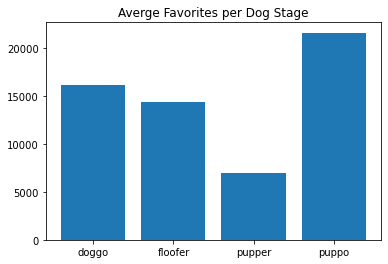

In [74]:
plt.title('Averge Favorites per Dog Stage')
plt.bar(x = dog_stage_fav_rat.index, height= dog_stage_fav_rat);

We can see that **puppo** has the most Favorites rate

## What dog stage got most retweets ?

In [75]:
stages = archive_master.groupby('dog_stage')['retweet_count']
dog_stage_ret_rat = stages.sum() / stages.count()

In [76]:
dog_stage_ret_rat.drop("None",inplace=True)
dog_stage_ret_rat

dog_stage
doggo      4856.384615
floofer    5378.666667
pupper     2258.391753
puppo      6473.954545
Name: retweet_count, dtype: float64

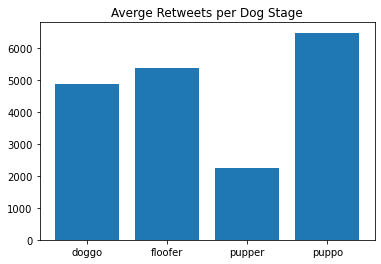

In [77]:
plt.title('Averge Retweets per Dog Stage')
plt.bar(x = dog_stage_ret_rat.index, height= dog_stage_ret_rat);

We can see that **puppo** has the most Retweets rate

## What dog stage got most ratings ?

In [78]:
stages = archive_master.groupby('dog_stage')['rating']
dog_stage_rating = stages.sum() / stages.count()

In [79]:
dog_stage_rating.drop("None",inplace=True)
dog_stage_rating

dog_stage
doggo      1.172308
floofer    1.200000
pupper     1.067010
puppo      1.200000
Name: rating, dtype: float64

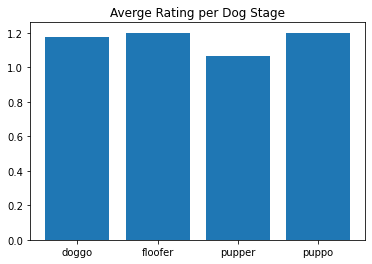

In [80]:
plt.title('Averge Rating per Dog Stage')
plt.bar(x = dog_stage_rating.index, height= dog_stage_rating);

As we can see there is no discrimination in rating

<a id='conclusion'></a>
## Conclusion

In conclusion, we found that **puppo** is more desirable than other stages since it got more Favorates and Retweets. Moreover, [@dog_rates](https://twitter.com/dog_rates) do kind of neutral rating without preferring a stage over others.